In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv('KdTreeData.csv')

# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      300 non-null    int64
 1   sub 1   300 non-null    int64
 2   sub 2   300 non-null    int64
 3   sub 3   300 non-null    int64
 4   sub 4   300 non-null    int64
 5   sub 5   300 non-null    int64
 6   sub 6   300 non-null    int64
 7   sub 7   300 non-null    int64
 8   sub 8   300 non-null    int64
 9   sub 9   300 non-null    int64
 10  sub 10  300 non-null    int64
dtypes: int64(11)
memory usage: 25.9 KB


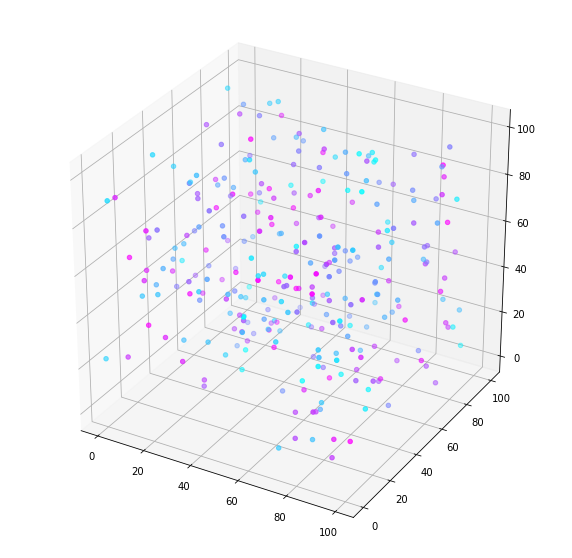

In [190]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sub 1'], df['sub 2'], df['sub 3'], c=df['sub 4'], cmap= "cool")
plt.show()

In [26]:
print(df.to_numpy()[:,1:])

[[66 24 76 ... 33  7 16]
 [92 52 49 ... 44 85 40]
 [37 95 13 ... 14 57  7]
 ...
 [90 11 91 ...  6 78 50]
 [ 5 27 98 ... 62 60 61]
 [85  3 25 ...  1 92 34]]


In [10]:
class Node:
    def __init__(self, point, leftNode, rightNode):
        self.point = point
        self.leftNode = leftNode
        self.rightNode = rightNode

In [39]:
def generateKDTree(pointList, depth = 0):
    if pointList.size == 0:
        return None

    k = len(pointList[0, 1:])  # assumes all points have the same dimension
    # Select axis based on depth so that axis cycles through all valid values
    axis = (depth % k)+1

    # Sort point list by axis and choose median as pivot element
    pointList = pointList[pointList[:, axis].argsort()]
    # point_list.sort(key=itemgetter(axis))
    median = len(pointList) // 2
    # print(pointList[median])

    # Create node and construct subtrees
    return Node( pointList[median], 
        generateKDTree(pointList[:median], depth + 1),
        generateKDTree(pointList[median + 1 :], depth + 1),
    )

theTree  = generateKDTree(df.to_numpy())

In [25]:
def printTree(node, level=0):
    if node != None:
        printTree(node.leftNode, level + 1)
        print(' ' * 4 * level + '-> ' + str(node.point[0]))
        printTree(node.rightNode, level + 1)

printTree(theTree)

                                -> 255
                            -> 29
                        -> 209
                            -> 194
                    -> 297
                                -> 146
                            -> 157
                        -> 118
                            -> 273
                -> 195
                                -> 75
                            -> 150
                        -> 25
                            -> 41
                    -> 175
                            -> 119
                        -> 282
                            -> 293
            -> 39
                                -> 199
                            -> 81
                        -> 162
                            -> 136
                    -> 31
                                -> 277
                            -> 101
                        -> 54
                            -> 219
                -> 108
                                -> 155
                      

Small scale experiment

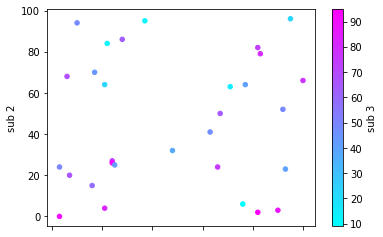

    id  sub 1  sub 2  sub 3
0    1     66     24     76
1    2     92     52     49
2    3     37     95     13
3    4      7     20     67
4    5     77     64     41
5    6     24     27     73
6    7     10     94     48
7    8    100     66     77
8    9     90      3     88
9   10      3     24     50
10  11     17     70     44
11  12     83     79     80
12  13     76      6      9
13  14     24     26     95
14  15     82     82     74
15  16     95     96     23
16  17     82      2     95
17  18     21      4     82
18  19      6     68     69
19  20     22     84     13
20  21     16     15     59
21  22     93     23     40
22  23     21     64     23
23  24     28     86     64
24  25     25     25     43
25  26     67     50     65
26  27     71     63     15
27  28      3      0     91
28  29     48     32     38
29  30     63     41     47


In [214]:
small2D = df.iloc[:30, :4]

small2D.plot(kind = 'scatter', x = 'sub 1', y = 'sub 2', c='sub 3', colormap ="cool" )

plt.show()
print(small2D)

In [215]:
smallTree  = generateKDTree(small2D.to_numpy()[:, :3])
printTree(smallTree)

                -> 28
            -> 4
                -> 10
        -> 21
                -> 18
            -> 25
                -> 14
    -> 6
                -> 19
            -> 11
                -> 7
        -> 23
                -> 20
            -> 24
                -> 3
-> 29
                -> 1
            -> 30
                -> 26
        -> 13
                -> 17
            -> 9
                -> 22
    -> 2
                -> 27
            -> 5
                -> 15
        -> 12
                -> 8
            -> 16


In [222]:
def plotKDTree(node, axes, dimensions,  level=0  , limit = [0,100,0,100]): # NOTE need improvement on the limit
    if node != None :
        newLimit  = limit.copy()
        if (level % 2 == 1):
            newLimit[3] = node.point[2]
        elif (level % 2== 0):
            newLimit[1] = node.point[1]
        plotKDTree(node.leftNode,  axes, dimensions, level = level + 1, limit = newLimit )
        
        
        cmap = cm.get_cmap(name='cool')
        if (level % 2 == 0):  # x axis
            axes.vlines(node.point[1], limit[2], limit[3],color = cmap(level/5) )
        elif (level % 2== 1): # y axis
            axes.hlines(node.point[2], limit[0], limit[1], color = cmap(level/5))
    
                
        newLimit  = limit.copy()
        if (level % 2 == 1):
            newLimit[2] = node.point[2]
        elif (level % 2== 0):
            newLimit[0] = node.point[1]

        plotKDTree(node.rightNode, axes, dimensions, level = level + 1, limit = newLimit)
    limit = [0,0,0,0]

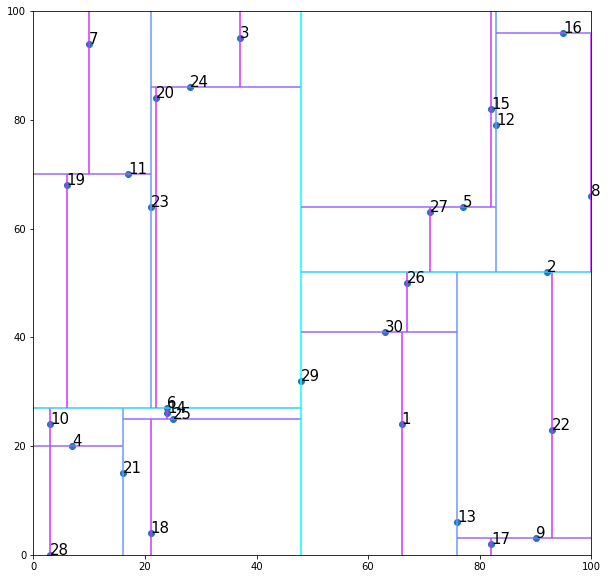

In [228]:

fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot()
ax2.scatter(small2D['sub 1'], small2D['sub 2'])
plotKDTree(smallTree, ax2 )
for index, row in small2D.iterrows():
     ax2.annotate(row["id"], (row['sub 1'], row['sub 2']), fontsize=15)
ax2.margins(x = 0, y = 0)
plt.show()
